<a href="https://colab.research.google.com/github/Sasi-2002-max/none/blob/main/internshipintermediatetask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from datetime import datetime
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

# Load the pollutant data
# Assume the CSV file has columns: 'Date', 'Location', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'
data = pd.read_csv('/content/delhiaqi.csv')

# Convert 'Date' to datetime
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Add 'Month' and 'Season' columns for seasonal analysis
data['Month'] = data.index.month
data['Season'] = pd.cut(data['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Monsoon', 'Autumn'], right=False)

# Summary statistics for pollutants
print(data.describe())

# 1. Key Pollutants Analysis
pollutants = ['co','no','no2','o3','so2','pm2_5','pm10','nh3']
pollutants_data = data[pollutants]


                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  Month  
count   561.000000   561.000000  561.000000  561.0  
mean    358.256364   420.988414   26.425062    1.0  
std     227.359117   271.287026   36.563094    0.0  
min      60.100000    69.080000    0.630000    1.0  
25%     204.450000   240.900000    8.230000    1.0  
50%     301.170000   340.900000   14.82000

In [ ]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data.head())


                          co     no    no2    o3    so2   pm2_5    pm10  \
date                                                                      
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

                       nh3  Month  Season  AQI    AQI Category  
date                                                            
2023-01-01 00:00:00   5.83      1  Winter  300  Very Unhealthy  
2023-01-01 01:00:00   7.66      1  Winter  300  Very Unhealthy  
2023-01-01 02:00:00  11.40      1  Winter  400       Hazardous  
2023-01-01 03:00:00  13.55      1  Winter  400       Hazardous  
2023-01-01 04:00:00  14.19      1  Winter  400       Hazardous  


In [ ]:
# AQI over time
fig = px.bar(data, x=data.index, y="AQI",
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# Define pollutants and their colors
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()


<Figure size 1400x700 with 0 Axes>

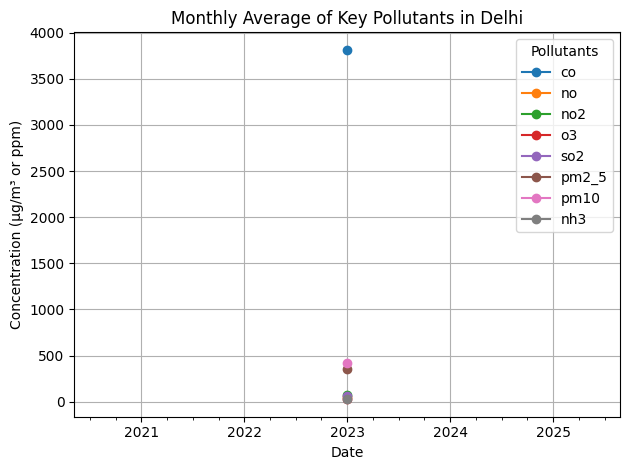

In [ ]:
# Plotting time series for key pollutants
plt.figure(figsize=(14, 7))
pollutants_data.resample('M').mean().plot(marker='o')
plt.title('Monthly Average of Key Pollutants in Delhi')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³ or ppm)')
plt.legend(title='Pollutants')
plt.grid()
plt.tight_layout()
plt.show()

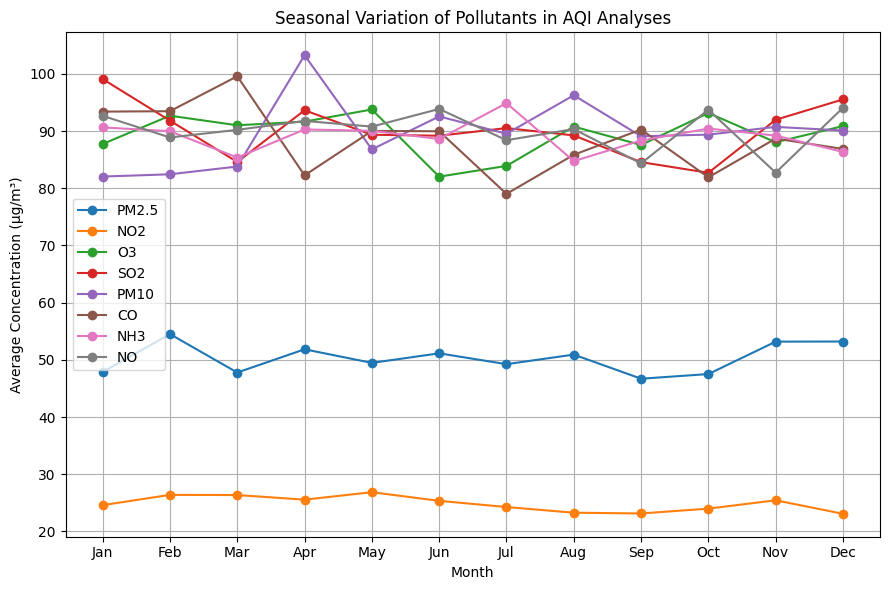

In [ ]:
# 2. Seasonal Variation
# Replace this with your actual AQI and pollutant data
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
pm25_data = np.random.rand(len(date_rng)) * 100  # Simulated PM2.5 values
no2_data = np.random.rand(len(date_rng)) * 50   # Simulated NO2 values
o3_data = np.random.rand(len(date_rng)) * 180   # Simulated O3 values
so2_data = np.random.rand(len(date_rng)) * 180   # Simulated so2 values
pm10_data = np.random.rand(len(date_rng)) * 180   # Simulated pm10 values
co_data = np.random.rand(len(date_rng)) * 180   # Simulated co values
nh3_data = np.random.rand(len(date_rng)) * 180   # Simulated nh3 values
no_data = np.random.rand(len(date_rng)) * 180   # Simulated no values


# Creating DataFrame
df = pd.DataFrame(date_rng, columns=['date'])
df['PM2.5'] = pm25_data
df['NO2'] = no2_data
df['O3'] = o3_data
df['so2'] = so2_data
df['pm10'] = pm10_data
df['co'] = co_data
df['nh3'] = nh3_data
df['no'] = no_data

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
monthly_avg = df.resample('M').mean()
monthly_avg['Month'] = monthly_avg.index.month

# Convert columns to uppercase AFTER adding 'Month'
monthly_avg.columns = monthly_avg.columns.str.upper()

seasonal_variation = monthly_avg.groupby('MONTH')[['PM2.5', 'NO2', 'O3','SO2','PM10','CO','NH3','NO']].mean() # Group by 'MONTH'

# Set date as index


plt.figure(figsize=(9, 6))
for pollutant in seasonal_variation.columns:
    plt.plot(seasonal_variation.index, seasonal_variation[pollutant], marker='o', label=pollutant)

plt.title('Seasonal Variation of Pollutants in AQI Analyses')
plt.xlabel('Month')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(seasonal_variation.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# 3. Geographical Factors
if 'Location' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Location', y='pm2_5', data=data)
    plt.title('pm2_5 Distribution by Location in Delhi')
    plt.ylabel('pm2_5 Concentration (µg/m³)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

else:
    print("Warning: 'Location' column not found in the DataFrame.")


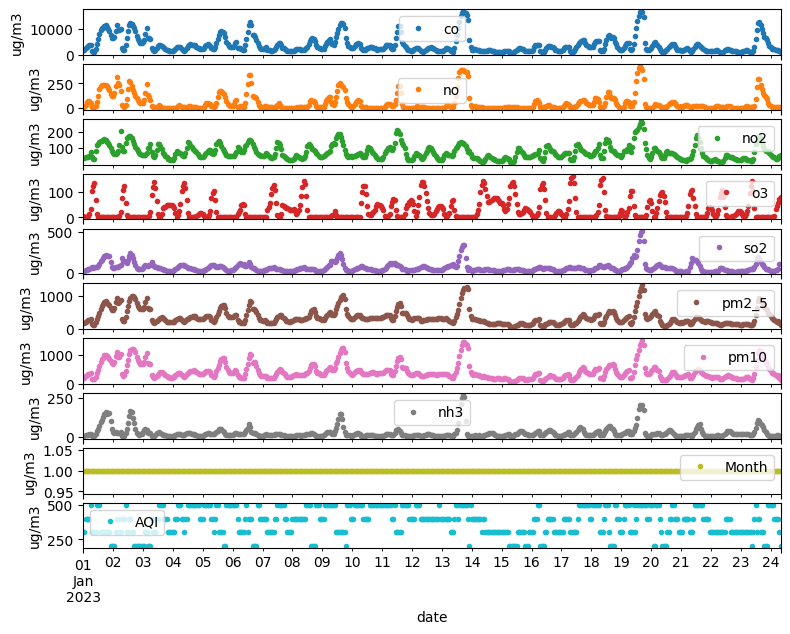

In [ ]:
def mergeColumns(data):
    #data['date'] = pd.to_datetime(data['date'])
    # Check if the columns exist before accessing them
    if 'Benzene' in data.columns and 'Toluene' in data.columns and 'Xylene' in data.columns:
        data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
        data = data.drop(['Benzene','Toluene','Xylene'], axis=1)  # Assign the result back to data
    else:
        print("Warning: 'Benzene', 'Toluene', or 'Xylene' columns not found in the DataFrame.")
    return data

data = mergeColumns(data)

import pandas as pd

def getEntireDataPlot(data, columns_to_plot): # Add columns_to_plot as an argument
    axes = data[columns_to_plot].plot(marker='.', linestyle='None', figsize=(9, 7), subplots=True)
    for ax in axes:
        ax.set_xlabel('date')
        ax.set_ylabel('ug/m3')

# Call the function with the desired columns
# For example, to plot all columns except 'date':
columns_to_plot = data.columns[data.columns != 'date'] # Get all columns except 'date'
getEntireDataPlot(data, columns_to_plot)

# 4. Health Impact Analysis (if health data is available)
# Load health data (e.g., respiratory issues)
# health_data = pd.read_csv('delhi_health_data.csv')  # Example structure: 'Date', 'Reported_Health_Issues'
# health_data['Date'] = pd.to_datetime(health_data['Date'])
# combined_data = pd.merge(data, health_data, on='Date')
# sns.regplot(x='PM2.5', y='Reported_Health_Issues', data=combined_data)


In [ ]:
# Show summary of key pollutant statistics
print("Summary of Key Pollutants:")
print(data[pollutants].mean())


Summary of Key Pollutants:
co       3814.942210
no         51.181979
no2        75.292496
o3         30.141943
so2        64.655936
pm2_5     358.256364
pm10      420.988414
nh3        26.425062
dtype: float64
